# LDA (Latent Dirichlet Allocation) Topic Modeling Playground

As an unsupervised machine learning approach, topic modeling can help researchers reduce large datasets into a small number of meaningful topics. This dimensionality reduction is achieved by constructing clusters of words from a collection of documents through probabilistic modelling. Documents are represented as a distribution of "latent" topics, which in turn are represented as a distribution of "observed" words. LDA is a topic modeling technique that builds words per topic and topics per document across all of the documents for a pre-determined number of topics in the corpus. 

Below is the information about the project directory and how you can use this notebook. 

**Description**

This project direcotry contains a Jupyter Notebook that can be used as a tutorial to learn about how to conduct and evaluate LDA topic modeling, as well as to interpret and present the results. Some helpful readings to gain a deeper understanding of topic modeling are also included in the notebook. These can help you increase your general knowledge of topic modeling and learn different topic modeling approaches. The project directory includes the following:

- LDA topic modeling playground Jupyter notebook
- Sample data for topic extraction
- yaml file to set up a conda environment in your own space 

*`topic_modeling_playground_notebook.ipynb`*

This notebook shows a step-by-step workflow to conduct an LDA topic modeling, including steps to process raw data, run LDA topic modeling, and evaluate and visualize the results. The contents of the notebook are grouped into five parts:

- Data preparation (Steps 1 - 3)
- Model training (Step 4)
- Model evaluation (Steps 5 - 7)
- Visualization of results (Step 8)
- Identification of dominant topics (Step 9)
- Model improvement (Steps 10 - 11)

Once you launch the notebook, you can run the code in each cell and see the results in an interactive way. 

*`papers.csv`* 

This is a [a published COVID-19 paper dataset](https://www.kaggle.com/draaslan/covid19-research-papers-dataset?select=papers.csv) available on Kaggle that contains journal papers submitted to journals from May 2020 to May 2021. It was cleaned and used to demonstrate how topic modeling (LDA in particular here) can be conducted to possibly explore some themes in the abstracts of the papers in the dataset.

*`topic_modleing_env.yml`*

This is the conda environment file for a virtual environment which should contain all necessary packages to run the text. 
 
**How to Use the Notebook** 

The yaml file sets up the environment. To create your topic_modeling environment, run the following command in the root directory:

`conda env create -f topic_modeling_env.yml`
 
For more information on setting up your own conda environment, check out [this page](http://rcpedia.stanford.edu/topicGuides/sharedCondaEnv.html).

**Helpful Readings**

- [Latent Dirichlet Allocation](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
- [Intuitive Guide to Latent Dirichlet Allocation](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)
- [Topic Modeling and Latent Dirichlet Allocation (LDA) in Python](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)
- [Reading Tea Leaves: How Humans Interpret Topic Models](http://papers.nips.cc/paper/3700-reading-tea-leaves-how-humans-interpret-topic-models.pdf)

**Note**: This is just one example workflow, feel free to explore the world of available tools/resources! 


## Step 1: Load your data

We are going to load the CoVID-19 dataset. Let's find out what researchers published related to COVID-19 this past year and how they can be classified using LDA topic modeling!

**Note**: Topic modeling generally doesn't work well with short text such as tweets nor with a small number of documents. Examine your data first to see if it is a good candidate for topic modeling.

In [1]:
# Read in your documents and check the shape

import pandas as pd

df = pd.read_csv('papers.csv')
df.shape

(121802, 10)

In [2]:
# Check the shape of the dataframe (number of rows and columns) and review the first five rows

print(f'\nThere are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.\n')

df.head()



There are 121802 rows and 10 columns in the dataset.



,Unnamed: 0,pmid,doi,journal,country,title,authors,abstract,citation_count,published_at
0,0,34013297,10.1101/2021.04.27.21256185,medRxiv : the preprint server for health sciences,United States,Pre-pandemic mental and physical health as pre...,"G David Batty, Ian J Deary, Drew Altschul",<Abstract>\n <AbstractText Labe...,0,2021-05-20 00:00:00
1,1,34013147,10.29337/ijsp.144,International journal of surgery protocols,England,A Study Protocol to Explore and Improve Access...,"Gianina-Ioana Postavaru, Bethan Myers, Tanweer...",<Abstract>\n <AbstractText Labe...,0,2021-05-20 00:00:00
2,2,34012470,10.1155/2021/5543977,Journal of environmental and public health,United States,Zero-Inflated Time Series Modelling of COVID-1...,"Kassim Tawiah, Wahab Abdul Iddrisu, Killian As...",<Abstract>\n <AbstractText>Disc...,0,2021-05-20 00:00:00
3,3,34006408,10.1016/j.vaccine.2021.04.054,Vaccine,Netherlands,Thrombocytopenia including immune thrombocytop...,"Kerry J Welsh, Jane Baumblatt, Wambui Chege, R...",<Abstract>\n <AbstractText Labe...,0,2021-05-19 00:00:00
4,4,34006403,10.1016/j.gerinurse.2021.04.009,"Geriatric nursing (New York, N.Y.)",United States,The impact of COVID-19 on building the next ge...,Barbara Resnick,"<?xml version=""1.0""?>\n<p/>\n",0,2021-05-19 00:00:00


## Step 2: Examine and clean data

We will look at the distribution of journals and countries. You should look at other columns as well to understand the data better. Then, we will examine the text in the abstract column to see if it needs to be cleaned. Understanding your data is an extremely important part of any research. As we are all aware, "Garbage in and garbage out!"

In [3]:
# Check the distribution of countries - US and England comprise the vast majority of papers

print(f'\nThere are a total of {df.country.nunique()} unique countries in which papers were published in the dataset.\n')

pd.DataFrame(df.country.value_counts().reset_index().values, columns = ['country', 'doc_counts'])



There are a total of 77 unique countries in which papers were published in the dataset.



,country,doc_counts
0,United States,41913
1,England,31065
2,Switzerland,9537
3,Netherlands,8871
4,Germany,4144
...,...,...
72,Ukraine,2
73,Malawi,2
74,British Virgin Islands,1
75,Lithuania,1


In [4]:
# Check the distribution of journals - Top 5 journals comprise 3/4 of the journal submissions

pd.set_option('display.max_colwidth', 100) # increase maximum width of a column

print(f'\nThere are a total of {df.journal.nunique()} unique journals in the dataset.\n')

pd.DataFrame(df.journal.value_counts().reset_index().values, columns = ['journal', 'doc_counts'])



There are a total of 6397 unique journals in the dataset.



,journal,doc_counts
0,BMJ (Clinical research ed.),1624
1,International journal of environmental research and public health,1470
2,PloS one,1338
3,Journal of medical virology,994
4,medRxiv : the preprint server for health sciences,917
...,...,...
6392,International journal of production economics,1
6393,Chemical physics,1
6394,British journal of psychotherapy,1
6395,Archiv der Pharmazie,1


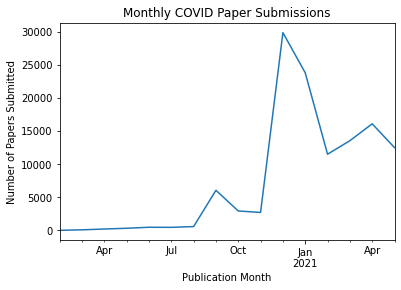

In [5]:
# Plot the number of monthly paper submissions in the time period - Submissions peaked in December

import matplotlib.pyplot as plt

# Convert the published date to datetime and plot a line graph
df['published_at'] = pd.to_datetime(df['published_at'])

df.groupby(df['published_at'].dt.to_period('M'))['journal'].count().\
    plot(kind = 'line', xlabel = 'Publication Month', ylabel = 'Number of Papers Submitted', title = 'Monthly COVID Paper Submissions');


In [6]:
# Check the abstract text of the first document

df.abstract[0]


'<Abstract>\n                <AbstractText Label="Importance" NlmCategory="UNASSIGNED">Although several predictors of COVID-19 vaccine hesitancy have been identified, the role of physical health has not been well-examined, and the association with mental health is unknown.</AbstractText>\n                <AbstractText Label="Objective" NlmCategory="UNASSIGNED">To examine the association of pre-pandemic mental health, physical health, and shielding with vaccine hesitancy after the announcement of the successful testing of the Oxford University/AstraZeneca vaccine.</AbstractText>\n                <AbstractText Label="Design Setting and Participants" NlmCategory="UNASSIGNED">We used individual-level data from a pandemic-focused investigation (COVID Survey), a prospective cohort study nested within the UK Understanding Society (Main Survey) project. In the week immediately following the announcement of successful testing of the first efficacious inoculation (November/December 2020), data o

Note that the raw abstract data contains a lot of xml tags and other artifacts such as unicode characters and extra spaces that need to be cleaned. 
We will not attempt to clean the data completely, but will:
- remove all xml tags
- remove newline characters with trailing spaces
- clean up unicode characters

In [7]:
# Check if there are null values in the abstract column

df[df.abstract.isnull() == True]

,Unnamed: 0,pmid,doi,journal,country,title,authors,abstract,citation_count,published_at
188,188,33937578,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
235,235,33931102,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
328,328,33914727,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
632,632,33914810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
648,648,33914730,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
...,...,...,...,...,...,...,...,...,...,...
121653,121653,32192278,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
121678,121678,32019669,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
121694,121694,33929003,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
121705,121705,33877113,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT


In [4]:
from bs4 import BeautifulSoup

def remove_xml(abstract):
    
    """
    
    This function removes xml tags from text.
    
    Input:
    abstract - abstract text from each paper in df
    
    Output:
    abstract_cleaned - abstract text free of xml tags and trailing spaces
    
    """
        
    # Create a soup object of the abstract tet
    soup = BeautifulSoup(abstract, 'lxml')
    
    # Find the tags that have the word 'abstract' and parse the text
    text = soup.find_all('abstract')
    
    # Create a list of the parsed abstract text and remove the newline character
    abstracts = []
    for i in text:
        text = i.get_text().replace('\n', ' ')
        abstracts.append(text)
    
    # Remove the list
    abstract_cleaned = ''.join(abstracts)
    
    return abstract_cleaned
    

In [5]:
# Clean the data

import html

def clean_data(df):
    
    """
    
    This function cleans the raw data.
    
    Input:
    df - raw data read into a pandas df
    
    Output:
    df - dataframe free of html tags, non-ASCII characters, trailing spaces, and rows with no abstract text
    
    """
    
    # Drop the rows with null values in the abstract column
    df.dropna(subset=['abstract'], inplace = True)
    
    # Remove xml tags with training spaces and eplace all non-ASCII with space
    df['abstract'] = df['abstract'].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in html.unescape(remove_xml(x).strip())]))

    # Drop the rows if the abstract doesn't esist
    df = df[(df.abstract != 'No Abstract.') & (df.abstract != '')]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df


In [6]:
# Clean the data and check the abstract text of the first document again. Check other documents too.

df = clean_data(df)

df['abstract'][1000]

'The availability of accurate and rapid diagnostic tools for COVID-19 is essential for tackling the ongoing pandemic. The aim of this study was to quantify the performance of different available types of antigen-detecting rapid diagnostic tests (Ag-RDTs) in the real-world hospital setting. In this retrospective analysis the diagnostic performance of seven different Ag-RDTs was compared with the real-time reverse transcription quantitative polymerase chain reaction (RT-qPCR) in terms of sensitivity, specificity and expected predictive values. A total of 321 matched Ag-RDT-RT-qPCR samples were analyzed retrospectively. The overall sensitivity and specificity of Ag-RDTs were 78.7% and 100%, respectively. However, a wide range of sensitivity estimates by brand (66.0-93.8%) and cycle threshold (Ct) cut-off values (Ct <25: 96.2%; Ct 30-35: 31.1%) was observed. The optimal Ct cut-off value that maximized sensitivity was 29. The routine use of Ag-RDTs may be convenient in moderate-to-high inte

In [10]:
# Check the shape of the dataframe again - 28,410 records were removed

df.shape


(82433, 10)

In [11]:
# Create a corpus for topic modeing with a list of abstracts 

doc_texts = df['abstract'].to_list()


## Step 3: Preprocess your documents

We will perform the following steps to preprocess data:

* **Tokenization** - Text is split into sentences and the sentences into words (lowercased).
* **Punctuation removal** - Puncutations are removed.
* **stopwords removal** - English stopwords are removed.
* **Lemmatization** - Words reduced to its root form (e.g., verbs in past and future tenses are changed into present).
* **Short words removal** - Words that are less than 3 characters are removed.

We've found that removing stopwords is the most beneficial preprocessing step when running topic modeling. Be sure to take a look at the stopword list you use and make sure it makes sense for your corpus! The NLTK Stopword list we are using is all lowercase, so that will also be part of our pre-processing. You can also customize the stopwords list by adding words that are common in your corpus.

Additionally, we only performed lemmatization here because this approach takes into account the morphological analysis of words. Stemming has some limitations and can result in errors due to overstripping or understripping the words. You should try different preprocessing methods to find the best ones for your data. For more information on data preprocessing methods, check out [this tutorial](https://www.tutorialspoint.com/natural_language_toolkit/index.htm).

In [12]:
# Import nltk libraries to preprocess corpus text

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [13]:
# Remove punctuations and stopwords and normalize words

def preprocess_docs(text, stop):
        
    """
    
    This function preporcesses document text in prepartion for model training.
    
    Input:
    text - cleaned document text in a list 
    stop - nltk English stopwords
    
    Output:
    text_normalized - normalized text with punctuation and, stopwords removed
    
    """
        
    punct = set(string.punctuation)
    lemma = WordNetLemmatizer()
    
    # Remove puntuations
    punct_clean = ''.join([w for w in text if w not in punct])
    
    # Remove stopwords
    stop_clean = ' '.join([w for w in punct_clean.lower().split() if w not in stop and len(w) > 2])
    
    # Lemmatize words
    text_normalized = ' '.join(lemma.lemmatize(w) for w in stop_clean.split())
    
    return text_normalized


In [14]:
# Take a look at the first 10 stop words

stopword_list = stopwords.words('english')
stopword_list[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
# Process documents and check the first 10 words of the first documnet

processed_docs = [preprocess_docs(text, stopword_list).split() for text in doc_texts]
processed_docs[0][0:10]


['although',
 'several',
 'predictor',
 'covid19',
 'vaccine',
 'hesitancy',
 'identified',
 'role',
 'physical',
 'health']

In [16]:
# Create a dictionary from 'processed_docs' containing the number of times a word appears in the training set 

import gensim
from gensim.corpora import Dictionary

corpus_dictionary = gensim.corpora.Dictionary(processed_docs)

# Check the dictionary

count = 0
for k, v in corpus_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
        

0 059
1 064
2 074
3 076
4 078
5 093
6 095
7 096
8 11955
9 12035
10 12item
11 154
12 1695
13 2020
14 6741
15 accompanying
16 adjusted
17 adjustment
18 age
19 aged
20 although


You can also filter out very rare or common words from your dictionary (choose your thresholds).
For example, remove tokens that appear in

* `no_below` (int, optional) – Keep words which are contained in at least `no_below` documents (number).
* `no_above` (float, optional) – Keep words which are contained in no more than `no_above` documents (percentage - fraction of total corpus size, not an absolute number).
* `keep_n` (int, optional) – Keep only the first `keep_n` most frequent tokens (number).

In [17]:
# Filter out words with the parameters mentioned above

corpus_dictionary.filter_extremes(no_below = 15, no_above = 0.6, keep_n = 10000)

# Recheck the dictionary

count = 0
for k, v in corpus_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
        

0 059
1 064
2 074
3 076
4 078
5 093
6 095
7 096
8 154
9 2020
10 accompanying
11 adjusted
12 adjustment
13 age
14 aged
15 although
16 analytical
17 announcement
18 anxiety
19 apparent
20 associated


In [18]:
# Convert list of documents (corpus) into a Document Term Matrix using the dictionary - Bag-of-words model for each document
# The dictionary shows how many words are in it and how many times those words appear

bow_corpus = [corpus_dictionary.doc2bow(doc) for doc in processed_docs]


In [19]:
# Checking the Bag of Words corpus for the sample document - (token_id, token_count)

sample_doc_num = 7
bow_doc = bow_corpus[sample_doc_num]

sample_doc = df['abstract'].iloc[sample_doc_num]

print(f'\nAbstract for the sample document:\n\n {sample_doc}\n')

for i in range(len(bow_doc)):
    print(f'Word {bow_doc[i][0]} {corpus_dictionary[bow_doc[i][0]]} appears {bow_doc[i][1]} time.') 
    


Abstract for the sample document:

 Sarcoidosis is an immune mediated chronic inflammatory disorder that is best characterized by non-caseating granulomas found in one or more affected organs. The COVID-19 pandemic poses a challenge for clinicians caring for sarcoidosis patients who may be at increased risk of infection compared to the general population. With the recent availability of COVID-19 vaccines, it is expected that clinicians raise questions regarding efficacy and safety in sarcoidosis. However, studies examining safety and efficacy of vaccines in sarcoidosis are lacking. In this review, we examine the current literature regarding vaccination in immunocompromised populations and apply them to sarcoidosis patients. The available literature suggests that vaccines are safe and effective in patients with autoimmune disorders and in those taking immunosuppressive medications. We strongly recommend the administration of COVID-19 vaccines in patients with sarcoidosis. We also prese

## Step 4: Build your topic models

You will have to train many models to compare how the different hyperparameters change the topics. In this example, we are changing the number of topics and also modifying multiple model hyperparameters, such as:

* **corpus** - Stream of document vectors or sparse matrix of shape (num_documents, num_terms) 
* **num_topics** - The number of requested latent topics to be extracted from the training corpus
* **id2word** - Mapping from word IDs to words
* **alpha** - Can set prior selecting strategies such as 'symmetric,' 'asymmetric', or 'auto' (optional)   
* **passes** - Number of passes through the corpus during training (optional)
* **random_state** - Either a randomState object or a seed to generate one (optional, useful for reproducibility)

For information on `gensim` hyperparameters for the LDA model, check out [this page](https://radimrehurek.com/gensim/models/ldamodel.html).

**Note**: When you have a large dataset and/or a large number of topics to test, it can take a long time to train the models. Certain parameters such as `eval_every` can also slow down the training process quite a bit. You may consider using the [ldamulticore function in gensim](https://radimrehurek.com/gensim/models/ldamulticore.html) to speed up the model traning. Please always be mindful of using resources if you are using shared computing systems such as the Yens!

In [20]:
# Import gensim, tqdm, numpy, and time libraries to run LDA models, compute coherence scores, and check the training progress

from gensim.models import CoherenceModel, ldamodel
from tqdm.auto import tqdm
import numpy as np
import time


In [42]:
# Run LDA models for different number of topics and calculate topic coherence scores

start_time = time.time()

# Select a range of topic numbers to test for LDA models
start_n, stop_n, interval_n = 5, 55, 5
topic_nums = np.arange(start_n, stop_n, interval_n).tolist()
topic_range = tqdm(topic_nums)

coherences = []
models = {}

for topic_num in topic_range:
    # Progress bar
    topic_range.set_description(f'Processing topic number {topic_num}')
    
    # Create a dictionary and filter texts
    dictionary = Dictionary(processed_docs)
    dictionary.filter_extremes(
        no_below = 15,
        no_above = 0.60,
        keep_n = 10000
    )
    
    # Create a corpus and run LDA models
    corpus = [dictionary.doc2bow(text) for text in processed_docs]
    lda_model = ldamodel.LdaModel(
        corpus = corpus,
        num_topics = topic_num,
        id2word = dictionary,
        random_state = 42,
        alpha = 'auto', 
        passes = 4       
    )
    
    # Compute coherence scores for LDA models
    cm = CoherenceModel(
        model = lda_model,
        texts = processed_docs,
        dictionary = dictionary,
        coherence = 'c_v'
    )
    coherences.append([topic_num, cm.get_coherence()])
    models[topic_num] = lda_model

time.sleep(1)

elapsed_time = (time.time() - start_time)/60

print(f'Finished building topic models! It took {elapsed_time:.2f} minutes.\n')


Finished building topic models! It took 60.36 minutes.



In [2]:
# Save the intermediary results 

import pickle

# pickle.dump(doc_texts, open('doc_texts.pk', 'wb'))
# pickle.dump(dictionary, open('dictionary.pk', 'wb'))
# pickle.dump(corpus, open('corpus.pk', 'wb'))
# pickle.dump(coherences, open('coherence_results.pk', 'wb'))
# pickle.dump(models, open('lda_models.pk', 'wb'))

# # To reload the saved results, use the below code

# doc_texts = pickle.load(open('doc_texts.pk', 'rb'))
# corpus = pickle.load(open('corpus.pk', 'rb'))
# dictionary = pickle.load(open('dictionary.pk', 'rb'))
# coherences = pickle.load(open('coherence_results.pk', 'rb'))
# models = pickle.load(open('lda_models.pk', 'rb'))


## Step 5: Evaluate your models 

Topic Coherence measures provide a metric to assess the quality of extracted topics and can aid in choosing the optimal number of topics. Ways to interprete the results can vary from meausre to measure. For example, for the c_v measure used here, the higher the score, the better the topics are extracted. However, for the c_umass measure, the closer scores are to zero, the better. In general, you're looking for an "elbow" in your coherence plot; this occurs when an increasing number of topics fails to improve the coherence score significantly. Below is a description of different coherence measures:

* **C_v** - Based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
* **C_p** - Based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
* **C_uci** - Based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
* **C_umass** - Based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
* **C_npmi** - An enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
* **C_a** - Based on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

For more information on model evaluation and hyperparameter tuning, take a look at [this Medium article](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0). 

In [22]:
# Import matplotlib and seaborn libraries for plotting results

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Convert the results to a dataframe

df_coherence = pd.DataFrame(coherences)
df_coherence.columns = ['topic_num','coherence']


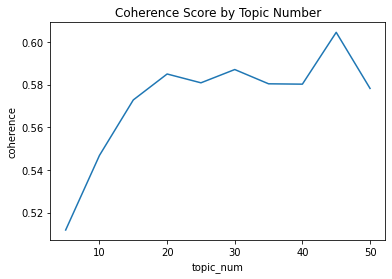

In [64]:
# Plot the coherence graph  

sns.lineplot(x = df_coherence['topic_num'], y = df_coherence['coherence']).set_title('Coherence Score by Topic Number');


In the above graph, the coherence score is the highest when the number of topics is 45. An elbow would be around 20 or 30 topics (the point where the slope of the curve is leveling off). Since the difference in coherence score between 20 and 45 is small, we will examine the 20 and 30 topic models in more detail. Selecting an optimal number of topics for your data can be tricky. In addition to comparing coherence scores across different LDA models, it is likely that you will need to use your domain knowledge to decide on the number of topics. There is no hard science here. Several factors such as the theoretical knowledge of the corpus, data size, and computational cost can often be considered as well in the decision-making process. 

Looking at the actual topics should be the final method to decide which topic model to go with. It is important to understand that topic modeling is not an objective approach that classifies documents against ground truth; rather, it is a tool to help us read and reduce the data. Below shows what words are occuring in each of the 20 and 30 topics, respectively. See which set of topics appear to classify sample documents better.

**Note**: You may notice that the results may slightly vary even if you train the models using the same corpus and keep the values of the model hiyperparmeters the same. This is due to the probablisitc nature of the LDA mdeling. Adding the random state and increasing the numbe of iterations help the models converge and become more stable. Coherence scores will change depneding on the range of topic numbers. 

## Step 6: Classify the topics - inferring topics from words

Once you decide on the number of topics, you can now try to assign a "label" to each extracted topic. Some topics are harder to label than others. For example, in the 30-topic model, Topic 29 is clearly about "COVID-19 vaccines" while Topic 5 can be labeled as "online education."

In [25]:
# Get topics for the trained model

def get_model_topics(lda_models, num_topics):
        
    """
    
    This function prints out the extracted topics and topic words of the trained model
    given the number of topics in the model. 
    
    Input:
    lda_models - Trained LDA models
    num_topics - Number of topics 
    
    Output:
    topics and topic words along with their probabilities
    
    """

    # Print topic number and associated words with probabilities 
    for topic_num, topic in models[num_topics].print_topics(-1):
        print(f'Topic {topic_num + 1}: \nWords: {topic} \n')
    

In [66]:
# Topic words for the 20-topic model

num_topics = 20

get_model_topics(models, num_topics)

Topic 1: 
Words: 0.022*"model" + 0.019*"chest" + 0.014*"lung" + 0.011*"pneumonia" + 0.011*"imaging" + 0.010*"method" + 0.010*"using" + 0.010*"used" + 0.009*"data" + 0.008*"opacity" 

Topic 2: 
Words: 0.023*"patient" + 0.021*"treatment" + 0.016*"therapy" + 0.015*"disease" + 0.011*"cytokine" + 0.011*"may" + 0.011*"respiratory" + 0.010*"severe" + 0.010*"use" + 0.010*"effect" 

Topic 3: 
Words: 0.023*"risk" + 0.019*"population" + 0.017*"social" + 0.016*"people" + 0.015*"older" + 0.014*"age" + 0.014*"individual" + 0.013*"health" + 0.013*"adult" + 0.011*"among" 

Topic 4: 
Words: 0.045*"patient" + 0.044*"care" + 0.016*"hospital" + 0.015*"pandemic" + 0.013*"management" + 0.013*"medical" + 0.013*"healthcare" + 0.010*"health" + 0.009*"risk" + 0.009*"staff" 

Topic 5: 
Words: 0.025*"health" + 0.024*"mental" + 0.021*"anxiety" + 0.019*"psychological" + 0.017*"study" + 0.016*"stress" + 0.013*"depression" + 0.013*"pandemic" + 0.012*"symptom" + 0.010*"level" 

Topic 6: 
Words: 0.033*"2020" + 0.022*"p

In [67]:
# Topic words for the 30-topic model

num_topics = 30

get_model_topics(models, num_topics)

Topic 1: 
Words: 0.063*"model" + 0.017*"data" + 0.017*"using" + 0.014*"used" + 0.012*"analysis" + 0.011*"result" + 0.011*"based" + 0.011*"method" + 0.009*"network" + 0.009*"prediction" 

Topic 2: 
Words: 0.052*"study" + 0.030*"review" + 0.020*"evidence" + 0.016*"clinical" + 0.015*"search" + 0.015*"literature" + 0.013*"article" + 0.013*"included" + 0.013*"systematic" + 0.013*"database" 

Topic 3: 
Words: 0.060*"activity" + 0.047*"physical" + 0.032*"food" + 0.031*"change" + 0.021*"exercise" + 0.018*"temperature" + 0.014*"time" + 0.014*"confinement" + 0.014*"consumption" + 0.013*"behavior" 

Topic 4: 
Words: 0.021*"research" + 0.021*"information" + 0.018*"data" + 0.012*"recommendation" + 0.011*"health" + 0.011*"use" + 0.009*"guideline" + 0.008*"expert" + 0.008*"medium" + 0.008*"technology" 

Topic 5: 
Words: 0.039*"student" + 0.028*"online" + 0.027*"education" + 0.023*"medical" + 0.021*"survey" + 0.019*"training" + 0.018*"program" + 0.016*"learning" + 0.013*"university" + 0.013*"virtual" 

## Step 7: Testing your model on sample documents for validation

Test different models on sample documents and compare the results by evaluating the generated topics.

In [27]:
# Get document topics

def get_doc_topics(df, doc_num, lda_models, num_topics, dictionary, stopwords):
    
    """
    
    This function preporcesses document text (abstract), 
    extract topics and topic words for the document using the trained topic model, and
    prints out the text, topics, and topic words.
    
    Input:
    df - dataframe of documents
    lda_models - Trained LDA models
    num_topics - Number of topics 
    dictionary - dictionary
    doc_num - index number of the document in the df
    
    Output:
    abstract text
    topics and their probabilities 
    topic words and their probabilities (limited to 5 words for each topic)
    
    """

    
    # Get the abstrat of the document and print it
    doc = df['abstract'].iloc[doc_num]
    print(f'\nAbstract for the sample document:\n\n {doc}\n')

    # preprocess the document
    bow_vector = dictionary.doc2bow(preprocess_docs(doc, stopword_list).split())
    
    # Sort the topic, probability list and print topics and corresponding words
    for topic_num, topic_prob in sorted(models[num_topics][bow_vector], key = lambda item: -1*item[1]):
        print(f'Probability: {round(float(topic_prob), 6)}\t  Topic {topic_num + 1}: {models[num_topics].print_topic(topic_num, 5)}')    


In [50]:
num_topics = 20
test_doc_num = 300

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 Down syndrome (DS) predisposes to severe immunologic reaction secondary to infectious triggers. Here, we report a pediatric DS patient with coronavirus disease 2019 (COVID-19) who developed a hyperinflammatory syndrome, severe acute respiratory distress syndrome, and secondary hemophagocytic lymphohistiocytosis requiring pediatric intensive care unit admission and treatment with steroids, intravenous immunoglobulin, and remdesivir. Investigations into genetic susceptibilities for COVID-19 and severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2)-associated complications warrant systematic clinical and scientific studies. We report a pediatric Down syndrome patient with coronavirus disease 2019 (COVID-19) who developed secondary hemophagocytic lymphohistiocytosis requiring treatment with steroids, intravenous immunoglobulin, and remdesivir. Investigations into genetic susceptibilities for COVID-19-associated complications warrant systematic cl

In [49]:
num_topics = 30
test_doc_num = 300

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 Down syndrome (DS) predisposes to severe immunologic reaction secondary to infectious triggers. Here, we report a pediatric DS patient with coronavirus disease 2019 (COVID-19) who developed a hyperinflammatory syndrome, severe acute respiratory distress syndrome, and secondary hemophagocytic lymphohistiocytosis requiring pediatric intensive care unit admission and treatment with steroids, intravenous immunoglobulin, and remdesivir. Investigations into genetic susceptibilities for COVID-19 and severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2)-associated complications warrant systematic clinical and scientific studies. We report a pediatric Down syndrome patient with coronavirus disease 2019 (COVID-19) who developed secondary hemophagocytic lymphohistiocytosis requiring treatment with steroids, intravenous immunoglobulin, and remdesivir. Investigations into genetic susceptibilities for COVID-19-associated complications warrant systematic cl

30 seems to be an optimal number of topics for this corpus because the model with 30 topics appear to capture the themes of the documents better than 20 topics. Pick different documents and see if the dominant topics for those documents make sense! In the next step, we will visualize the results.

## Step 8: Visualize the topics

### Examining topics with PyLDAVis

This PyLDAVis tool can help explore the topics generated by LDA models. 
* Each **circle** represents a topic. The larger the bubble, the higher percentage of the number of documents in the corpus is about that topic.
* **Distances** between circles represent the relatedness of the topics. We'd like to see the discrete topics with minimal overlaps.
* **Blue bars** represent the overall frequency of each word in the corpus.
* **Red bars** represent the frequency of a word belonging to a topic.
* For **both bars**, the longer the bar, the higher the frequency of a given word for a given topic.

For more information, visit [this page](https://pyldavis.readthedocs.io/en/latest/readme.html#usage)

In [37]:
# Display top 30 words for 30 topics with the highest weights - topics are sorted by their weights so the order of topics is different.

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

num_topics = 30

vis = pyLDAvis.gensim.prepare(models[num_topics], corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.194141 -0.047407       1        1  8.590568
23     0.200309  0.140210       2        1  6.772275
8     -0.025065  0.212787       3        1  6.329872
5      0.123743 -0.018774       4        1  5.468648
16    -0.120118 -0.109895       5        1  5.362212
22    -0.098650 -0.187759       6        1  5.275766
29    -0.088405  0.152109       7        1  4.944621
20     0.085100 -0.132503       8        1  4.588320
7      0.224750 -0.025506       9        1  4.586871
15     0.026368  0.185423      10        1  4.234150
24     0.084262  0.113990      11        1  3.579403
6     -0.038826  0.071378      12        1  3.557010
3     -0.169048 -0.109398      13        1  3.551952
0     -0.082805  0.004932      14        1  3.287979
13     0.059221  0.034601      15        1  3.241301
14    -0.150426  0.145545      16        1  3.089792
1     -0.008849  0.051793      17        1  2.723761
27     0.194898 -0.055869      18        1  2.437320
17    -0.086698 -0.045514      19        1  2.399145
4     -0.051726 -0.171374      20        1  2.334115
12    -0.065572  0.169556      21        1  2.143915
28    -0.228396  0.025936      22        1  1.902401
19    -0.147576  0.047588      23        1  1.837637
21     0.093738  0.115039      24        1  1.531825
25     0.184079 -0.023073      25        1  1.474939
10    -0.065756 -0.203201      26        1  1.337713
2      0.107597 -0.169581      27        1  1.144875
11     0.116970 -0.164598      28        1  1.051238
18     0.063115 -0.055287      29        1  0.624081
26     0.057906  0.048852      30        1  0.596295, topic_info=         Term           Freq          Total Category  logprob  loglift
171   patient  158664.000000  158664.000000  Default  30.0000  30.0000
682  sarscov2   65446.000000   65446.000000  Default  29.0000  29.0000
132      care   39041.000000   39041.000000  Default  28.0000  28.0000
254      case   52171.000000   52171.000000  Default  27.0000  27.0000
47     health   66655.000000   66655.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
879  positive     433.504037   18321.413519  Topic30  -4.8789   1.3783
351  infected     407.307336   10759.742492  Topic30  -4.9413   1.8482
87       risk     397.300343   38282.401038  Topic30  -4.9661   0.5541
254      case     395.399670   52171.373612  Topic30  -4.9709   0.2398
345  evidence     345.581057   13027.312657  Topic30  -5.1056   1.4926

[2105 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5260      4  0.780726       000
5260      9  0.173094       000
5260     29  0.045978       000
1426      2  0.221120      0001
1426      8  0.000823      0001
...     ...       ...       ...
7176     22  0.956314      zika
8174     22  0.929660      zinc
8174     27  0.068776      zinc
7554      1  0.040431  zoonotic
7554     21  0.958519  zoonotic

[8105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 24, 9, 6, 17, 23, 30, 21, 8, 16, 25, 7, 4, 1, 14, 15, 2, 28, 18, 5, 13, 29, 20, 22, 26, 11, 3, 12, 19, 27])

### Displaying top 10 words for each topic in WordCloud 

The WordCloud tool shows the size of the words proportional to the weight in each topic. For wordcloud object parameters, check out [this page](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

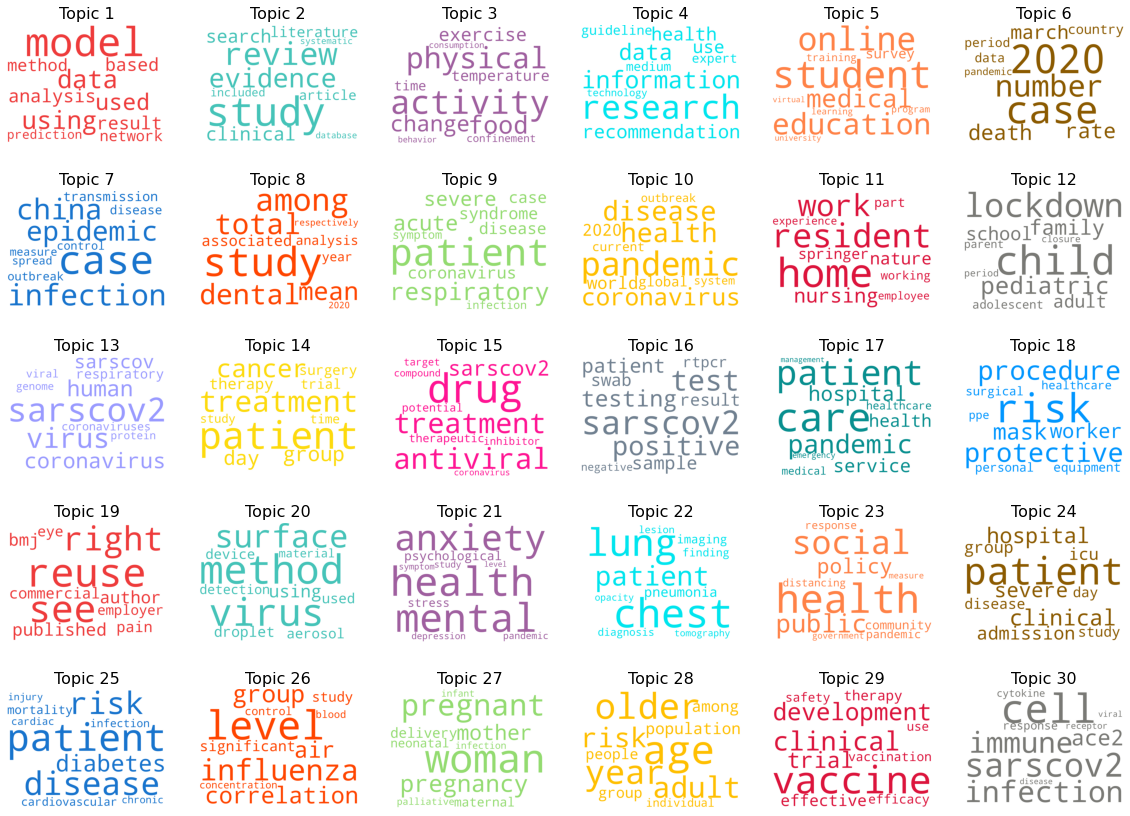

In [9]:
# Create WordCloud images

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a color map for your wordcloud - adjust the number of color codes if necessary to match the number of topics selected
color_codes = ['#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', '#8B5A00', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C', '#797975',  
               '#999aff',  '#FDDA0D', '#ff1493', '#708090', '#088F8F', '#0096FF',
               '#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', '#8B5A00', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C', '#797975']

# Build the WordCloud 
wc = WordCloud(background_color = 'white',
                  width = 2000,
                  height = 1500,
                  color_func = lambda *args, **kwargs: color_codes[i],
                  prefer_horizontal = 1)

# Extract topics from your LDA model to display in WordCloud

num_topics = 30
num_words = 10
rows = 5
cols = 6

# Create a figure and subplots that match the number of selected topics
fig, axes = plt.subplots(rows, cols, figsize=(20,15), sharex = True, sharey = True)
fig.subplots_adjust(hspace = .1)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)    
    
    # Createa a topic word, probability list and convrt it to a dictionary
    topic_word_prob_list = models[num_topics].show_topic(i, num_words)
    topic_word_dict = {t[0]:t[1] for t in topic_word_prob_list}
    
    # Display topic words in wordcloud
    wc.generate_from_frequencies(topic_word_dict, max_font_size = 500)
    plt.gca().imshow(wc)
    plt.gca().set_title('Topic ' + str(i+1), fontdict = dict(size = 16))
    plt.gca().axis('off')

    if i+1 == 30:
        plt.savefig('wc_30.png')


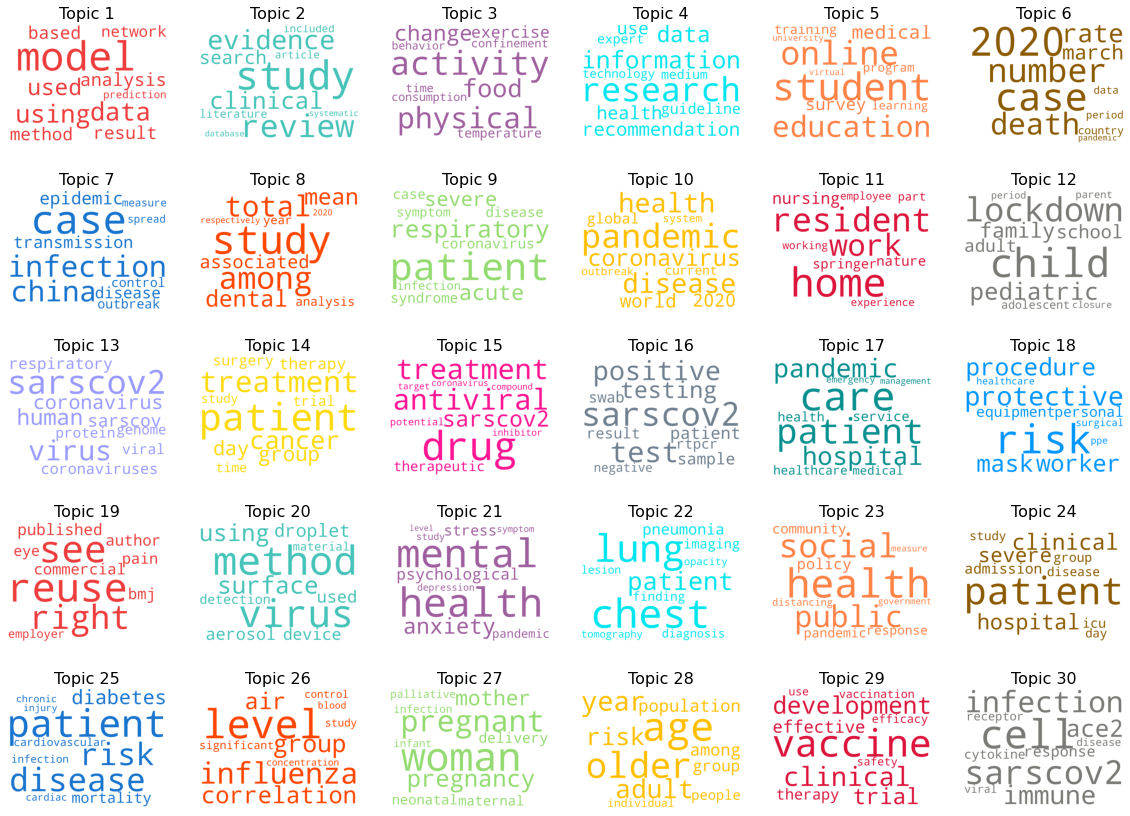

In [72]:
# Create WordCloud images

from wordcloud import WordCloud

# Create a color map for your wordcloud - adjust the number of color codes if necessary to match the number of topics selected
color_codes = ['#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', '#8B5A00', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C', '#797975',  
               '#999aff',  '#FDDA0D', '#ff1493', '#708090', '#088F8F', '#0096FF',
               '#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', '#8B5A00', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C', '#797975']

# Build the WordCloud 
wc = WordCloud(background_color = 'white',
                  width = 2000,
                  height = 1500,
                  color_func = lambda *args, **kwargs: color_codes[i],
                  prefer_horizontal = 1)

# Extract topics from your LDA model to display in WordCloud

num_topics = 30
num_words = 10
rows = 5
cols = 6

# Create a figure and subplots that match the number of selected topics
fig, axes = plt.subplots(rows, cols, figsize=(20,15), sharex = True, sharey = True)
fig.subplots_adjust(hspace = .1)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)    
    
    # Createa a topic word, probability list and convrt it to a dictionary
    topic_word_prob_list = models[num_topics].show_topic(i, num_words)
    topic_word_dict = {t[0]:t[1] for t in topic_word_prob_list}
    
    # Display topic words in wordcloud
    wc.generate_from_frequencies(topic_word_dict, max_font_size = 500)
    plt.gca().imshow(wc)
    plt.gca().set_title('Topic ' + str(i+1), fontdict = dict(size = 16))
    plt.gca().axis('off')
    

In [ ]:
# Save the pyLDAvis and worcloud plots

pickle.dump(vis, open('vis_30.pk', 'wb'))
pickle.dump(fig, open('wc_30.pk', 'wb'))

# # To reload the saved results, use the below code

# vis = pickle.load(open('vis_30.pk', 'rb'))
# fig = pickle.load(open('wc_30.pk', 'rb'))


## Step 9: Identify dominant topic per document

Finally, we can identify a dominant topic for each document by selecting the topic with the highest probability in that document. Identifying dominant topics can help you classify documents into meaningful categories and analyze the distribution of topics over a collection of documents. Please remember that a document is comprised of multiple topics with varying degrees of probabilities; it is possible that several topics are similar in probabilities for a document, yet only one can be selected as a dominant topic. You should view the results with caution.

In [17]:
# Identify a dominant topic and its probability for each document and add it to the original df

num_topics = 30

def get_dominant_topics(lda_model, corpus, texts):
        
    '''
    
    This fundction creates a dataframe of dominant topics and their probabilities for documents and 
    concatenate it with the document dataframe.
    
    Input:
    lda_model - LDA model tranied to generate topics from documents
    corpus - documents  
    df - dataframe of documents 
    
    
    Output:
    topics_df - dataframe that contains dominant topics and their probabilities with 
                corresponding document ids, journals, titles, and abstracts.
                
    '''

    # Create an empty df to store topics, probabilities, and keywords
    topics_df = pd.DataFrame()

    # Get topics in each document and sort them
    for i, row_list in enumerate(models[num_topics][corpus]):
        row = row_list[0] if models[num_topics].per_word_topics else row_list            
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        
        # Get the dominant topic, probability, and topic keywords for each document
        for j, (topic_num, topic_prob) in enumerate(row):
            if j == 0:  # this is a dominant topic
                topic_word_prob_list = models[num_topics].show_topic(topic_num)
                topic_keywords = ', '.join([word for word, prob in topic_word_prob_list])
                topics_df = topics_df.append(pd.Series([str(int(topic_num +1)), round(topic_prob,2), topic_keywords]), ignore_index = True)
            else:
                break
    
    # Name the columns
    topics_df.columns = ['dominant_topic', 'probability', 'topic_keywords']
    
    # Subset the document df columns
    cols = ['pmid', 'journal', 'title', 'abstract']
    doc_df = df[cols]
    
    # Concatenate document df with topics df
    topics_df = pd.concat([topics_df, doc_df], axis = 1)
    
    return topics_df


In [74]:
# Create a dominant topic df and check topic assignments to documents

df_topics = get_dominant_topics(models[num_topics], bow_corpus, df)

# Save the df_topics
df_topics.to_csv('df_topics.csv', index = False)

# Check the first 10 papers
df_topics.head(10)

,dominant_topic,probability,topic_keywords,pmid,journal,title,abstract
0,21,0.32,"health, mental, anxiety, psychological, stress, pandemic, depression, study, symptom, level",34013297,medRxiv : the preprint server for health sciences,Pre-pandemic mental and physical health as predictors of COVID-19 vaccine hesitancy: evidence fr...,"Although several predictors of COVID-19 vaccine hesitancy have been identified, the role of phys..."
1,4,0.23,"research, information, data, recommendation, health, use, guideline, expert, medium, technology",34013147,International journal of surgery protocols,A Study Protocol to Explore and Improve Access to Medical Services and Information for Recently ...,This two-phase study seeks to contribute to research in the field of rural cancer health; specif...
2,1,0.40,"model, data, using, used, analysis, result, based, method, network, prediction",34012470,Journal of environmental and public health,Zero-Inflated Time Series Modelling of COVID-19 Deaths in Ghana.,Discrete count time series data with an excessive number of zeros have warranted the development...
3,6,0.36,"2020, case, number, death, rate, march, country, data, period, pandemic",34006408,Vaccine,Thrombocytopenia including immune thrombocytopenia after receipt of mRNA COVID-19 vaccines repor...,"The objective of this study is to assess cases of thrombocytopenia, including immune thrombocyto..."
4,7,0.21,"case, infection, china, epidemic, transmission, disease, outbreak, control, measure, spread",34001377,"Geriatric nursing (New York, N.Y.)",Effects of social isolation on a long-term care resident with dementia and depression during the...,The older population and medically frail persons are at higher risk of severe infections and dea...
5,10,0.36,"pandemic, disease, health, coronavirus, world, 2020, global, current, outbreak, system",33996992,Frontiers in sociology,"Rituals of Containment: Many Pandemics, Body Politics, and Social Dramas During COVID-19 in Paki...","Infecting millions of people, causing around two million deaths, and affecting billions of peopl..."
6,17,0.29,"care, patient, pandemic, hospital, service, health, healthcare, medical, emergency, management",33996989,Frontiers in sociology,Perceptions and Experiences of Frontline Urban Indian Organization Healthcare Workers With Infec...,Coronavirus disease 2019 (COVID-19) has created significant challenges for outpatient healthcare...
7,25,0.32,"patient, disease, risk, diabetes, mortality, cardiovascular, infection, cardiac, chronic, injury",33996868,Frontiers in medicine,"COVID-19 and Sarcoidosis, Readiness for Vaccination: Challenges and Opportunities.",Sarcoidosis is an immune mediated chronic inflammatory disorder that is best characterized by no...
8,14,0.35,"patient, treatment, cancer, group, day, therapy, surgery, trial, time, study",33996852,Frontiers in medicine,Diagnostic Delay of Pulmonary Embolism in COVID-19 Patients.,"Pulmonary embolism (PE) is a frequent, life-threatening COVID-19 complication, whose diagnosis c..."
9,1,0.38,"model, data, using, used, analysis, result, based, method, network, prediction",33996842,Frontiers in medicine,Distinguishing Coronavirus Disease 2019 Patients From General Surgery Emergency Patients With th...,"Background: During the epidemic, surgeons cannot identify infectious acute abdomen patients with..."


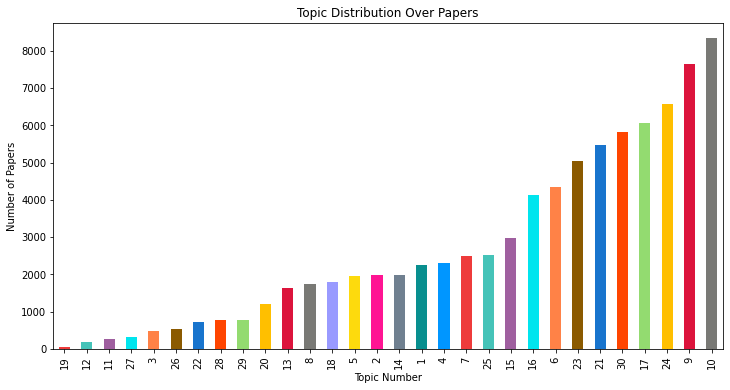

In [75]:
# Examine the distribution of topics over papers
# The color codes for dominant topics don't match those in wordcloud images becaues the topics are sorted by frequency

df_topics.groupby(df_topics['dominant_topic'])['pmid'].size().sort_values().\
    plot(kind = 'bar', figsize = (12,6), color = color_codes, \
         xlabel = 'Topic Number', ylabel = 'Number of Papers', \
         title = 'Topic Distribution Over Papers');


The graph indicates that the most prevalent topics in this dataset are related to COVID as a pandemic and respiratory disease. When you look at the topics assigned to each document, you sometimes find what appears to be mismatches. Because topic modeling is a purely mathmatical inference approach, it doesn't always coincides with human judgement. Additionally, as mentioned above, a document is a mixture of topics. You can check what other topics were extracted from those mismatched documents.

In [76]:
# Check out the papers submitted to the Vaccine journal and examine the assigned topics

df_topics[df_topics.journal == 'Vaccine'].head(20)

,dominant_topic,probability,topic_keywords,pmid,journal,title,abstract
3,6,0.36,"2020, case, number, death, rate, march, country, data, period, pandemic",34006408,Vaccine,Thrombocytopenia including immune thrombocytopenia after receipt of mRNA COVID-19 vaccines repor...,"The objective of this study is to assess cases of thrombocytopenia, including immune thrombocyto..."
901,29,0.34,"vaccine, clinical, development, trial, effective, therapy, efficacy, vaccination, safety, use",33838948,Vaccine,Vaccines for a healthy future: 21st DCVMN Annual General Meeting 2020 report.,The Developing Countries Vaccine Manufacturers' Network held its 21st Annual General Meeting vir...
903,25,0.23,"patient, disease, risk, diabetes, mortality, cardiovascular, infection, cardiac, chronic, injury",33824037,Vaccine,Strategy to identify priority groups for COVID-19 vaccination: A population based cohort study.,Evidence from COVID-19 outbreak shows that individuals with specific chronic diseases are at hig...
906,23,0.26,"health, social, public, policy, community, pandemic, response, distancing, government, measure",33810905,Vaccine,Media usage predicts intention to be vaccinated against SARS-CoV-2 in the US and the UK.,There is existing evidence of a relationship between media use and vaccine hesitancy. Four onlin...
945,23,0.28,"health, social, public, policy, community, pandemic, response, distancing, government, measure",33962838,Vaccine,The impact of disruptions caused by the COVID-19 pandemic on global polio eradication.,"In early 2020, the COVID-19 pandemic led to substantial disruptions in global activities. The di..."
964,6,0.32,"2020, case, number, death, rate, march, country, data, period, pandemic",33941406,Vaccine,Missed childhood immunizations during the COVID-19 pandemic in Brazil: Analyses of routine stati...,There is widespread concern that disruption to health services during the COVID-19 pandemic has ...
990,29,0.26,"vaccine, clinical, development, trial, effective, therapy, efficacy, vaccination, safety, use",33931250,Vaccine,Changes and remaining challenges for the Japanese immunization program: Closing the vaccine gap.,The Japanese immunization program has made considerable progress since 2009: several new vaccine...
1462,23,0.35,"health, social, public, policy, community, pandemic, response, distancing, government, measure",33966909,Vaccine,Factors influencing Covid-19 vaccine acceptance across subgroups in the United States: Evidence ...,Public health officials warn that the greatest barrier to widespread vaccination against Covid-1...
1469,23,0.31,"health, social, public, policy, community, pandemic, response, distancing, government, measure",33958223,Vaccine,"Modelling of COVID-19 vaccination strategies and herd immunity, in scenarios of limited and full...",Several vaccines for SARS-CoV-2 are expected to be available in Australia in 2021. Initial suppl...
1932,10,0.26,"pandemic, disease, health, coronavirus, world, 2020, global, current, outbreak, system",33895016,Vaccine,RSV genomic diversity and the development of a globally effective RSV intervention.,Respiratory syncytial virus (RSV) is the most common cause of serious lower respiratory tract il...


In [95]:
num_topics = 30
test_doc_num = 1462

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 Public health officials warn that the greatest barrier to widespread vaccination against Covid-19 will not be scientific or technical, but the considerable public hesitancy to take a novel vaccine. Understanding the factors that influence vaccine acceptance is critical to informing public health campaigns aiming to combat public fears and ensure broad uptake. Employing a conjoint experiment embedded on an online survey of almost 2,000 adult Americans, we show that the effects of seven vaccine attributes on subjects' willingness to vaccinate vary significantly across subgroups. Vaccine efficacy was significantly more influential on vaccine acceptance among whites than among Blacks, while bringing a vaccine to market under a Food and Drug Administration Emergency Use Authorization had a stronger adverse effect on willingness to vaccinate among older Americans and women. Democrats were more sensitive to vaccine efficacy than Republicans, and both group

## Step 10 : Improve your models

After evaluating the preliminary results, see if you can improve your models. Possible approaches include:
* Use **different preprocessing steps** (e.g., filtering words for nouns, removing numbers/people's names)
* Customize the **stopwords list**
* Compute **[TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)** (Term Frequency and Inverse Docuement Frequency) on the corpus for word relevancy
* Tune **model hyperparameters**

Please note that there is no one-size-fits-all appraoach and that implementing the above strategies may not lead to better results. In fact, the results can be worse. You need to spend time learning your data and finding the best way to capture the meaningful topics for your data. Tune your models in the below cell. 

## Step 11: Evaluate your models and select the one that makes the most sense for your data

Evaluate your models using coherence scores and your judgement. Lots of work, data exploration, and trial and error is involved in devloping a good topic model for your data—it requires many iterations and repeated validation of your results. You can get topics from any datsets. The important question is "How are you going to validate the results?" We have provided multiple evaluation and validation steps in this notebook. Play with this notebook using your own dataset. Hope you have fun learning about topic modeling!